In [1]:
import sys
sys.path.append("..")

%load_ext autoreload
%autoreload 1
%aimport pygenesig.validation
%aimport pygenesig.gini
%aimport pygenesig.bioqc
%aimport pygenesig.perfmeasures
%matplotlib inline

from pygenesig.validation import * 
from pygenesig.gini import * 
from pygenesig.bioqc import * 
import pygenesig.perfmeasures as pm
import numpy as np
import pandas as pd

import seaborn as sns
from pylab import * 

## Load a dataset
Expression Matrix + Tissue Labels

In [2]:
expr = np.load("../data/gtex/exprs.npy")
target = np.loadtxt("../data/gtex/target.csv", delimiter=",", dtype=str)

## Make Signatures

In [3]:
sg = GiniSignatureGenerator(expr, target)

In [4]:
signatures = sg.mk_signatures(np.array(list(range(len(target)))))

## Test Signatures
(You could also load a different dataset, e.g. from a different species here)

In [5]:
st = BioQCSignatureTester(expr, target)

In [6]:
confmat = st.test_signatures(signatures, np.array(list(range(len(target)))))

/pstore/home/sturmg/.local/lib/python3.5/site-packages/pygenesig/bioqc.py:94: RuntimeWarning: divide by zero encountered in log10
  bioqc_res_log = -np.log10(bioqc_res)


In [12]:
sig_labels = st.sort_signatures(signatures)

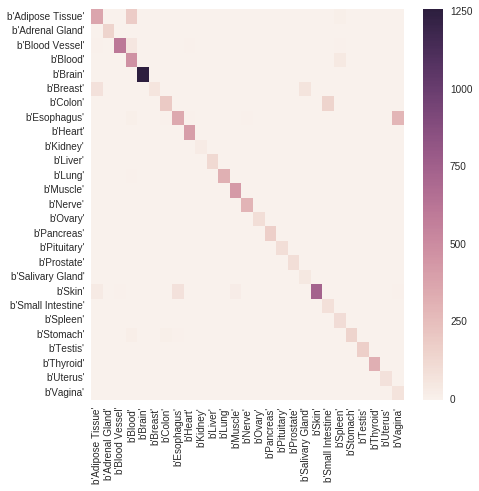

In [8]:
fig, ax = subplots(figsize=(7, 7))
sns.heatmap(confmat, ax=ax, xticklabels=sig_labels, yticklabels=sig_labels)


Binary classifications performance per signatures

In [9]:
for i, sig in enumerate(sig_labels):
    TP = confmat[i, i]
    FN = np.sum(confmat[i, :]) - TP
    FP = np.sum(confmat[:, i]) - TP
    TN = np.sum(confmat) - TP - FN - FP
    m = (TP, FN, FP, TN)
    print(sig, pm.sens(*m), pm.spec(*m), pm.mcc(*m))

b'Adipose Tissue' 0.649913344887 0.984146955209 0.689080668795
b'Adrenal Gland' 1.0 1.0 1.0
b'Blood Vessel' 0.882438316401 0.99821337417 0.923372479993
b'Blood' 0.919765166341 0.965061143 0.746200445951
b'Brain' 1.0 0.999587118084 0.99860448652
b'Breast' 0.289719626168 1.0 0.533400512698
b'Colon' 0.565217391304 0.997310513447 0.706730730413
b'Esophagus' 0.52332361516 0.988391376451 0.635968464244
b'Heart' 1.0 0.997904597559 0.978958933014
b'Kidney' 1.0 1.0 1.0
b'Liver' 1.0 0.999881037354 0.995765381692
b'Lung' 0.984375 1.0 0.991854577262
b'Muscle' 1.0 0.995799876467 0.960641338935
b'Nerve' 1.0 0.998418683858 0.978506039359
b'Ovary' 1.0 0.999881347888 0.994825852595
b'Pancreas' 1.0 0.999880296864 0.997029106558
b'Pituitary' 1.0 1.0 1.0
b'Prostate' 0.905660377358 1.0 0.951097218837
b'Salivary Gland' 0.929824561404 0.99196976854 0.635853186811
b'Skin' 0.82808988764 0.999607072692 0.89907639506
b'Small Intestine' 0.954545454545 0.982576745289 0.584355330538
b'Spleen' 1.0 0.992281201758 0.7